Constance Delannoy

APPM 4650 | Homework 5

July 24, 2020

In [30]:
from IPython.display import HTML
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code is by default hidden for easier reading."></form>''')

__Question 1__

We have: 

$$\begin{pmatrix}
   a_{11} & a_{12} \\
   a_{21} & a_{22} \\
\end{pmatrix}
\begin{pmatrix}
   x_1 \\
   x_2 \\
\end{pmatrix} = \begin{pmatrix}b_1 \\b_2 \\\end{pmatrix}$$

We can rewrite this system as:

$$
a_{11}x_1 + a_{12}x_2 = b_1 \rightarrow x_2 = \frac{b_1}{a_{12}} - \frac{a_{11}}{a_{12}}x_1 (1) \\
a_{21}x_1 + a_{22}x_2 = b_2 \rightarrow x_2 = \frac{b_2}{a_{22}} - \frac{a_{21}}{a_{22}}x_1 (2) \\
$$


If we project ourselves in a ${x_1; x_2}$ plane and plot these two lines, we find that the angle of (1) has angle $\theta_1$ with the $x_1$ axis and the angle of (2) has angle 
$\theta_2$ with the $x_1$ axis. Furthermore, we find that at the place of their intersection, we have $\alpha = \theta_2 - \theta_1$. We included a graph of this below.


In [33]:
Image(url='Question1.PNG', width=500, height=500)

Furthermore, the hypotenus of the triangles made by (1), (2) and the $x_1$ axis has length $\frac{-a_{11}}{a_{12}}$, which we can read from the equation itself (it is similar to rise/run). Similarly, we find that the hypotenuse of the lines from (1), (2) and a $x_1$ axis brought "up" where the lines intersect has length $\frac{-a_{21}}{a_{22}}$.

From these findings it follows that 

$$
tan(\theta_1) = \frac{-a_{21}}{a_{22}} \\
tan(\theta_2) = \frac{-a_{11}}{a_{12}} \\
$$


On a slightly different note, let's take a closer look at our line $tan(\alpha) = tan(\theta_1 - \theta_2)$.

We want to rewrite this in terms of $tan(\theta_1)$ and $tan(\theta_2)$.

Here we go:

$$
tan(\theta_1 - \theta_2) = \frac{sin(\theta_1 - \theta_2)}{cos(\theta_1 - \theta_2}\\
\text{We know that }sin(\theta_1 - \theta_2) = sin\theta_1cos\theta_2 - cos\theta_1sin\theta_2 \text{ and } cos(\theta_1 - \theta_2) = cos\theta_1cos\theta_2+sin\theta_1sin\theta_2 \text{ thus: }\\
tan(\theta_1 = \theta_2) = \frac{sin\theta_1cos\theta_2 - cos\theta_1sin\theta_2}{cos\theta_1cos\theta_2+sin\theta_1sin\theta_2} \\
\text{We can now divide by }cos\theta_1cos\theta_2\text{to get}\\
tan(\theta_1-\theta_2)=\frac{tan\theta_1 - tan\theta_2}{1+tan\theta_1tan\theta_2}\\
$$

Plugging in the values we found for both tangents, we now get:

$$
tan(\alpha) = tan(\theta_1 - \theta_2) = \frac{tan\theta_1 - tan\theta_2}{1+tan\theta_1tan\theta_2} \\
tan(\alpha) = \frac{\frac{-a_{21}}{a_{22}} + \frac{a_{11}}{a_{12}}}{1 + \frac{a_{11}}{a_{12}}(\frac{a_{21}}{a_{22}})} \\
tan(\alpha) = \frac{(a_{11}a_{22} - a_{12}a_{21})(\frac{1}{a_{12}a_{22}})}{(a_{11}a_{21}+a_{12}a_{22})(\frac{1}{a_{12}a_{22}})} \\
$$

Thus:

$$
tan(\alpha) = \frac{a_{11}a_{22}-a_{12}a_{21}}{a_{11}a_{21}+a_{12}a_{22}}
$$

__Question 2__

We define the initial vector $x_0$ as:

$$
x_0 = \begin{pmatrix}
   24/4 \\
   30/4 \\
   -24/4 \\
\end{pmatrix}
$$

We will run Gauss-Seidel with values of $\omega \in [-2; 2]$ in increments of 0.1.
We define convergence to the 6th decimal place as when each element of the vector $x_{i+1}$ is within 

6th decimal place of the corresponding element of $x_i$.

With these definitions in mind, we find the solution vector $x$ to be equal to:

$$
x = \begin{pmatrix}
   3 \\
   4 \\
   -5 \\
\end{pmatrix}
$$

Below we show a graph of how the number of iterations to reach this solution varies with different values of $\omega$. We found that the most optimal values of $\omega$ are [1.25, 1.26, 1.27, 1.31].


Below we show a graph of how the number of iterations to reach this solution varies with different values of $\omega$.

We found that the most optimal values of $\omega$ are [1.25, 1.26, 1.27, 1.31].

With and of these, we reach convergence with 14 iterations.

In [34]:
def sor(a, b, x0, w, tol, iters):
    """This function performs Gauss-Steidel with relaxation as described in the homework Q2.
    
    Keyword arguments:
    a -- matrix A
    b -- matrix B
    x0 -- initial value of vector X
    w -- relaxation parameter
    tol -- tolerance
    iters -- number of times -1 to run algorithm
    """
    
    k = 0
    n = len(x0)
    x=[None]*3
    
    while k <= iters:
        for i in range(n):
            sum1 = 0
            sum2 = 0
            
            for j in range(i):
                sum1 += a[i,j]*x[j]
                
            for j in range(i, n):
                sum2 += a[i,j]*x0[j]

            x[i] = x0[i] + (w/a[i,i])*(b[i] - sum1 - sum2)
            
        if abs(x[0]-x0[0]) < tol and abs(x[1]-x0[1]) < tol and abs(x[2]-x0[2]) < tol:
            k+=1
            #print('convergence achieved')
            break
                
        if k == iters:
            #print('maximum number of iterations achieved')
            break
                
        k += 1
        for i in range(n):
            x0[i] = x[i]
            
    return x, k

In [35]:
res = []
iters = []
omegas1 = np.arange(-2, 0, 0.01).tolist()
omegas2 = np.arange(0.25, 2.25, 0.01).tolist()
omegas = omegas1 + omegas2

for v in omegas:
    A = np.matrix([[4,3,0],[3,4,-1],[0,-1,4]])
    X = [24/4, 30/4, -24/4]
    B = [24, 30, -24]
    x_sol, num_iters = sor(A, B, X, v, 10**(-6), 100)
    res.append(x_sol)
    iters.append(num_iters)

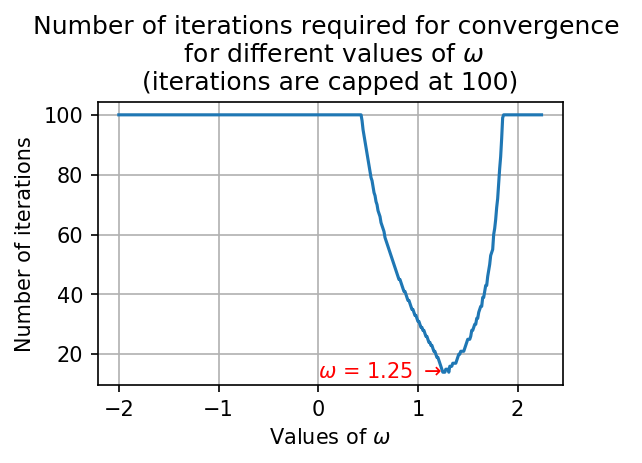

In [40]:
fig1 = plt.figure(figsize = (4, 2.5), dpi = 150)
ax1 = fig1.add_subplot(1, 1, 1)

ax1.grid(b=True, which='major', linestyle='-')
ax1.plot(omegas, iters)
ax1.legend()
ax1.set_xlabel(r'Values of $\omega$')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Number of iterations required for convergence \n for different values of ' + r'$\omega$' + '\n(iterations are capped at 100)')
ax1.text(0, 12, r'$\omega$ = 1.25 $\rightarrow$', color = 'r')

plt.show()

In [39]:
#tst = pd.DataFrame({'i':iters, 'omegas':omegas})
#tst2 = tst.where(tst['i']==14).dropna()
#res[300]

__Question 3__

(a) We have the following matrix at hand:

$$
A = \begin{pmatrix}
   3 & 0 & 1 \\
   0 & 5 & 0 \\
   -1 & 1 & -1 \\
\end{pmatrix}
$$

We start by calculating its minor $M$

$$
M = \begin{pmatrix}
   -5-0 & 0 & 0+5 \\
   0 -1 & -3+1 & 3-0 \\
   0-5 & 0 & 15-0 \\
\end{pmatrix} = \begin{pmatrix}
   -5 & 0 & 5 \\
   -1 & -2 & 3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

We now find the corresponding matrix of cofactors $C$:

$$
C = \begin{pmatrix}
   -5 & 0 & 5 \\
   1 & -2 & -3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

From $C$, we find the Adjugate matrix that we call $C^T$ by transposing $C$:

$$
C^T = \begin{pmatrix}
   -5 & 1 & -5 \\
   0 & -2 & 0 \\
   5 & -3 & 15 \\
\end{pmatrix}
$$

Finally, we compute the determinant of the original matrix $A$:

$detA = 3(-5-0) + 0 + 1(0+5) = -10$

We can now at last compute the inverse of $A$:

$$
A^{-1} = \begin{pmatrix}
   0.5 & -0.1 & 0.5 \\
   0 & 0.2 & 0 \\
   -0.5 & 0.3 & -1.5 \\
\end{pmatrix}
$$

(b)

In [6]:
def matrixIter(x0, A):
    """
    This function returns the next iteration of the inverse of a matrix
    based on an initial guess x0 and the original matrix A.
    
    x0 --- initial matrix inverse guess of size 3x3
    A --- original matrix of size 3x3
    """
    
    I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
    
    return x0*(2*I - A*x0)

In [7]:
X0 = np.matrix([[0.5, -0.1, 0.4],[0, 0.2, 0],[-0.4, 0.3, -1.5]])
A = np.matrix([[3, 0, 1],[0, 5, 0],[-1, 1, -1]])

In this case, we use the initial guess 

$$
x_0 = \begin{pmatrix}
   0.5 & -0.1 & 0.4 \\
   0 & 0.2 & 0 \\
   -0.4 & 0.3 & -1.5 \\
\end{pmatrix}
$$

and find that $x_1$ is equal to:

$$
x_1 = \begin{pmatrix}
   0.49 & -0.1 & 0.51 \\
   0 & 0.2 & 0 \\
   -0.51 & 0.3 & -1.47 \\
\end{pmatrix}
$$

In [8]:
#matrixIter(X0, A)

(c) 
To find the deviation of $x_0$ and $x_1$ from $A^{-1}$, we compute the matrice's infinity norm for the difference between the solution and $x_0$ and $x_1$.

The resulting difference matrices are $D_0$ corresponding to $A^{-1}-x_0$ and $D_1$ corresponding to $A^{-1}=x_1$:

$$
D_0 = \begin{pmatrix}
   0 & 0 & 0.1 \\
   0 & 0 & 0 \\
   -0.1 & 0 & 0 \\
\end{pmatrix}
$$

$$
D_1 = \begin{pmatrix}
   0.01 & 0 & -0.01 \\
   0 & 0 & 0 \\
   0.01 & 0 & -0.03 \\
\end{pmatrix}
$$

To find the infinity norm, we now take the maximum of the absolute values for the sum of each row.

We get that the deviation as we defined it is equal to 0.1 for $D_0$ and $0.02$ for $D_1$, which makes sense since $D_1$ is closer to the real answer than $D_0$ is. The two infinity norms differ by a magnitude of 10, suggesting we will rapidly achieve convergence. Indeed, if we run the iterations for longer, we find the true answer for $A^{-1}$ in 4 iterations with a precison to 5 decimal places.

__Question 4__

(a)

We wrote code to perform the power method, and found the following eigenvalue $\lambda$ and eigenvector $V$ to 6th decimal places with 9 iterations with the initial vector $x_0 = (1,1,1,1)^T$:
        
$$
\lambda = 2.618034 
\text{  &  }  
V = \begin{pmatrix}
   1 \\
   -0.618034\\
   -0.618034 \\
   1\\
\end{pmatrix}
$$

In [9]:
# This is for Q3
#0.3 - (-0.1+0.2+0.3)/3
#0.51 + (0.5+0-1.5)/3

In [10]:
def powerMethod(A_start, x_start, iters, tol):
    """
    This function runs the power method to find eigenvalues of A.
    It returns dominant eigenvalue, associated eigenvector and number of iterations
    
    A_start --- initial matrix
    x_start --- initial guess
    iters -- number of iterations to run this for
    tol -- tolerance for convergence
    """
    for i in range(iters):
        x_1 = A_start*x_start
        x_2 = A_start*x_1
        ratios = [None]*len(x_start)
        
        for j in range(len(x_start)):
            
            if x_start[j][0] == 0 or x_1[j][0] == 0:
                ratios[j] = 0
                
            elif abs(x_1[j]/x_start[j] - x_2[j]/x_1[j]) < tol:
                ratios[j] = (x_2[j]/x_1[j])
        
        full = all(r != None for r in ratios)
        if full:
            return ratios, x_2, i
        elif i == iters-1:
            print('convergence not achieved')
        else:
            x_start = x_1

In [11]:
A = np.matrix([[2, -1, 0, 0],[-1, 2, -1, 0],[0, -1, 2, -1], [0, 0, -1, 2]])
x0a = [[1],[1],[1],[1]]

eigena, Va, num_itera = powerMethod(A, x0a, 100, 10**(-6))

In [12]:
#eigena

In [13]:
#Va/Va[0] # normalizing

In [14]:
#num_itera

(b)

We use a similar procedure with a different initial vector $x_1 = (1,1,5,1)^T$ and precision to the 4th decimal place. We find a different answer than in (a) within 31 iterations:

$$
\lambda = 3.6180
\text{  &  }  
V = \begin{pmatrix}
   1 \\
   -1.6180\\
   1.6180 \\
   -1\\
\end{pmatrix}
$$

In [15]:
#x0b = [[1],[1],[5],[1]]
#eigenb, Vb, num_iterb = powerMethod(A, x0b, 100, 10**(-5))

In [16]:
#eigenb

In [17]:
#Vb/Vb[0]

In [18]:
#num_iterb

(c)

While we found different results in (a) and (b), both are valid eigenvalues and eigenvectors of our matrix $A$. The reason why we did not get $\lambda_{max}$ in part (a) may be because our initial vector was a close enough approximation of the eigenvector in (a). 

__Question 5__

(a) To compute the Rayleigh quotient and error estimate, we first use the power method to find $x_2$ and $x_3$.

In [19]:
A5 = np.matrix([[2, -1, 1], [-1, 3, 2], [1, 2, 3]])
x05 = [[1], [1], [1]]

#x15 = A5*x05
#x25 = A5*x15
#x35 = A5*x25

We find that:

$$
x_2= 
\begin{pmatrix}
   6 \\
   22 \\
   28 \\
\end{pmatrix}
;
x_3= 
\begin{pmatrix}
   18 \\
   116 \\
   134 \\
\end{pmatrix}
$$

We now compute $m_1 = x_2^T x_3$ and $m_0 = x_2^Tx_2$ and find that:

$m_0 = 1304; m_1 = 6412$.

We then deduct the Rayleigh quotient $q = \frac{m_1}{m_0}$ to find:

$q = 4.917178$

The associated error is $\epsilon = \sqrt{\frac{m_2}{m_0}-q^2}$ with $m_2 = x_3^Tx_3$, which gives $\epsilon = 0.398478$

In [20]:
#m0 = np.transpose(x25)*x25
#m1 = np.transpose(x25)*x35
#m2 = np.transpose(x35)*x35

In [21]:
#m0

In [22]:
#m1

In [23]:
#q = m1/m0
#q

In [24]:
#diff = float(m2/m0)-float(q)**2
#e = math.sqrt(diff)
#e

(b)

We use a similar approach as in question 4 to get $\lambda_{max}$ and $V_{max}$. Within 25 iterations, we converge towards 2 solutions: $\lambda = 3$ and $\lambda = 5$. These are both valid eigenvalues, and we deduct that:

$$
\lambda_{max} = 5  
$$

However, the algorithm does not provide a satisfactory eigenvector. The answer we get is:

$$
V_{max} = \begin{pmatrix}
   1 \\
   1465573 \\
   1465573 \\
\end{pmatrix}
$$

This is not a proper eigenvector of matrix A. The reason the method failed may be because matrix A is not invertible (the 3rd eigenvalue is 0). This may throw off our algorithm. However, because we know that $\lambda_{max} = 5$, we can analyticall deduct the associated eigenvector:

$$
V_{max} = \begin{pmatrix}
   0 \\
   1 \\
   1 \\
\end{pmatrix}
$$

In [25]:
#eigen, V, num_iter = powerMethod(A5, x05, 100, 10**(-6))

In [26]:
#eigen

In [27]:
#V/V[0]

In [28]:
#num_iter